In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Customer Purchasing Behaviors.csv")

In [3]:
df.shape

(238, 7)

In [4]:
df.isna().sum()

user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


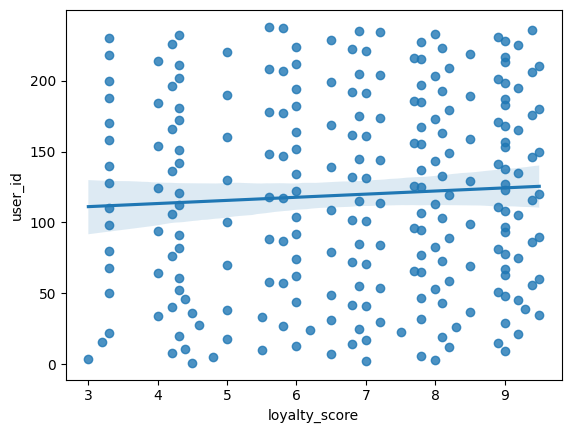

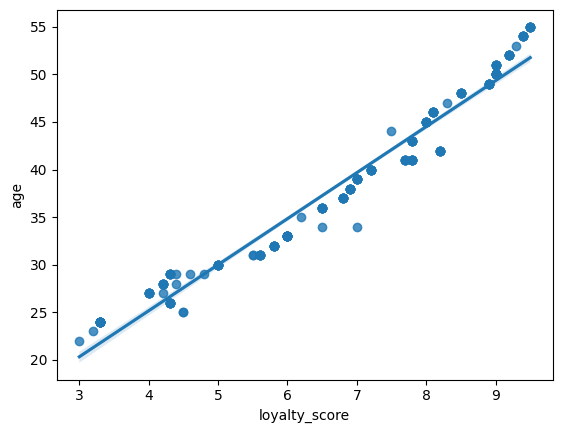

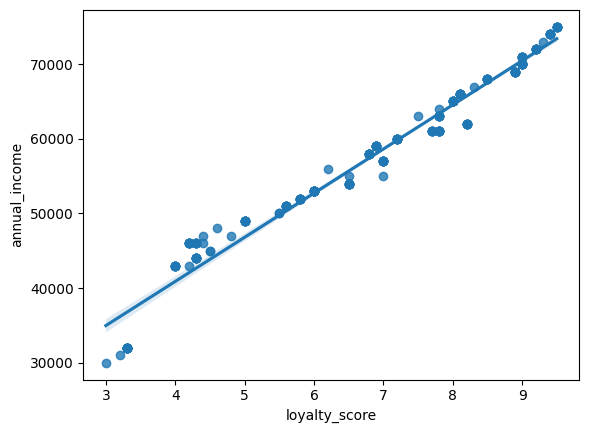

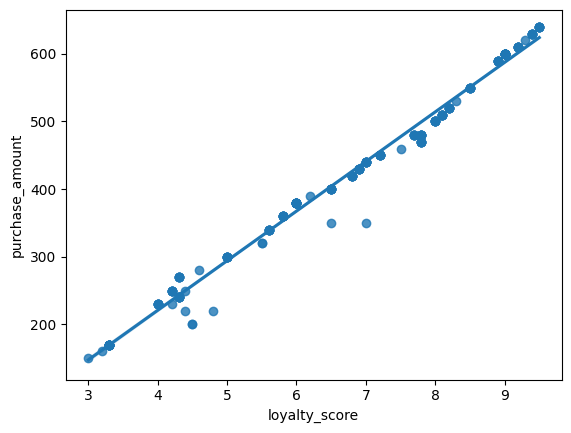

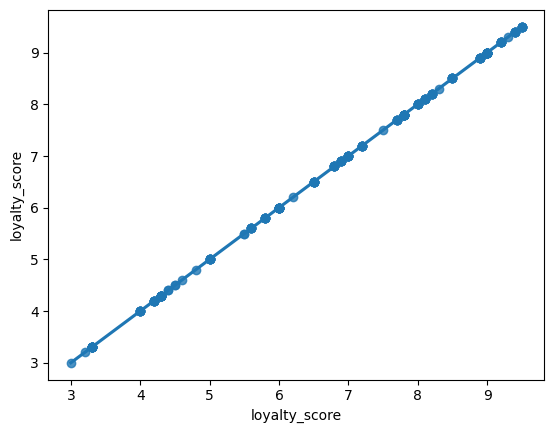

TypeError: can't multiply sequence by non-int of type 'float'

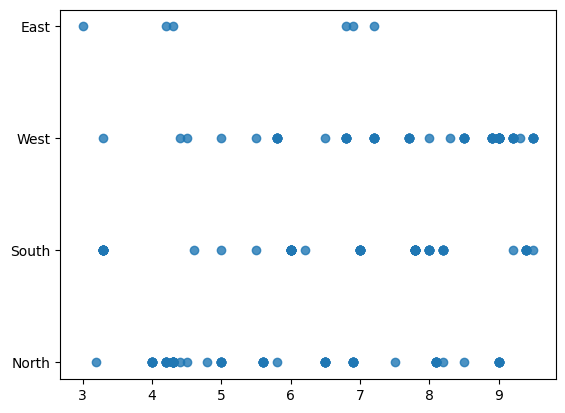

In [6]:
for i in df.columns:
    sns.regplot(x=df.loyalty_score, y=df[i])
    plt.xlabel="loyalty_score"
    plt.ylabel="i"
    plt.show()

In [7]:
df=df.drop(["user_id"],axis=1)

In [8]:
df.head()

,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,25,45000,200,4.5,North,12
1,34,55000,350,7.0,South,18
2,45,65000,500,8.0,West,22
3,22,30000,150,3.0,East,10
4,29,47000,220,4.8,North,13


In [9]:
df.region.value_counts()

region
North    78
South    77
West     77
East      6
Name: count, dtype: int64

In [10]:
df.region=df.region.map({"East":1,"West":2,"North":3,"South":4})

In [11]:
df.head()

,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,25,45000,200,4.5,3,12
1,34,55000,350,7.0,4,18
2,45,65000,500,8.0,2,22
3,22,30000,150,3.0,1,10
4,29,47000,220,4.8,3,13


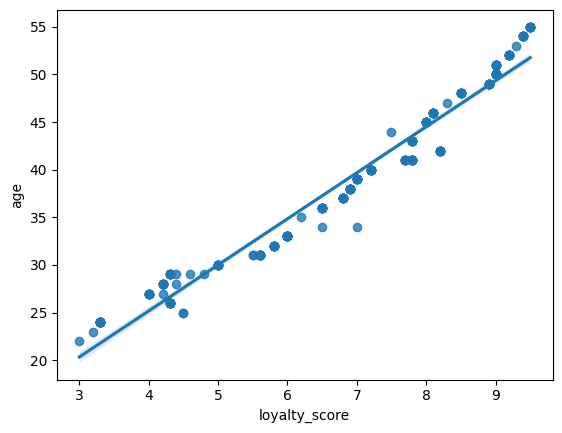

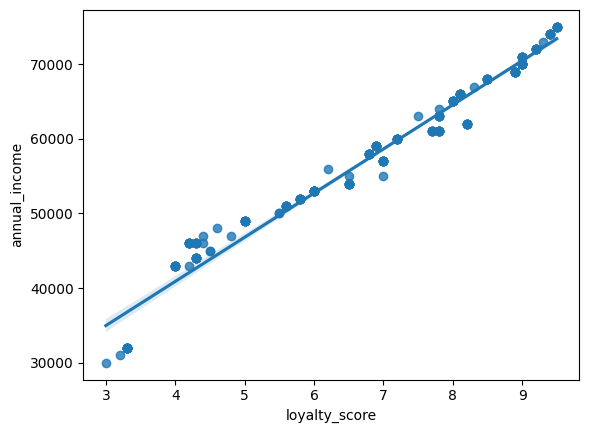

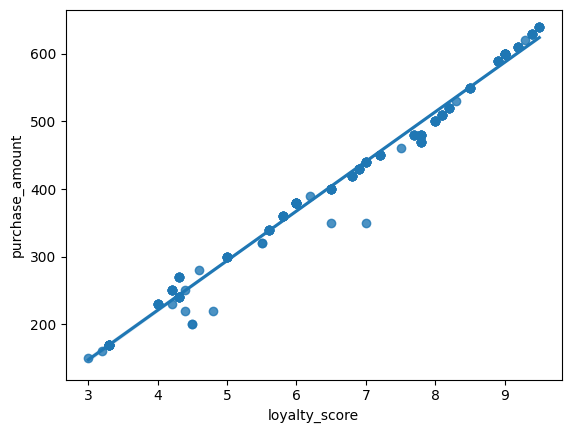

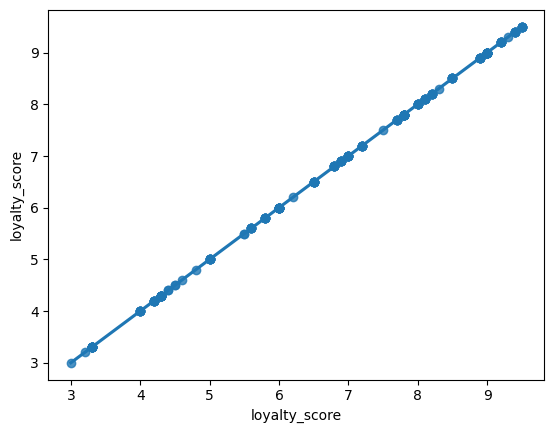

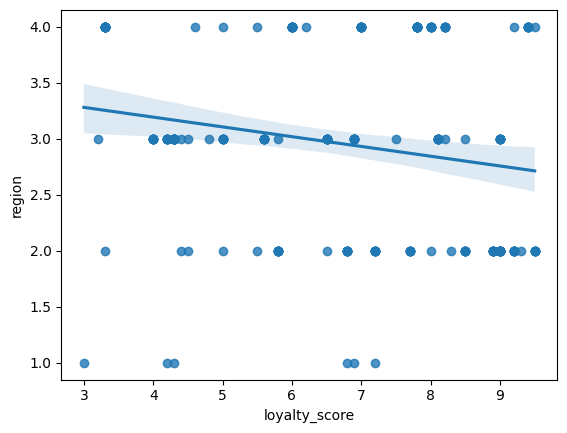

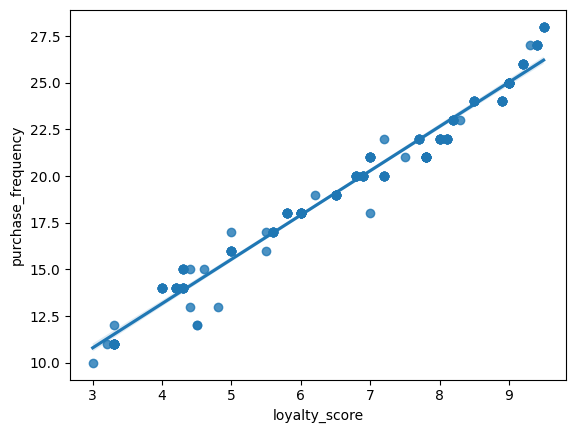

In [12]:
for i in df.columns:
    sns.regplot(x=df.loyalty_score, y=df[i])
    plt.xlabel="loyalty_score"
    plt.ylabel="i"
    plt.show()

In [13]:
df.head(1)

,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,25,45000,200,4.5,3,12


In [14]:
df.columns

Index(['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'region',
       'purchase_frequency'],
      dtype='object')

In [15]:
X=df[['age', 'annual_income', 'purchase_amount','region','purchase_frequency']]

In [16]:
X.head()

,age,annual_income,purchase_amount,region,purchase_frequency
0,25,45000,200,3,12
1,34,55000,350,4,18
2,45,65000,500,2,22
3,22,30000,150,1,10
4,29,47000,220,3,13


In [17]:
y=df.loyalty_score

In [18]:
sc=StandardScaler()
X_scaler=sc.fit_transform(X)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X_scaler,y,test_size=0.30,random_state=42)

In [24]:
LR=LinearRegression()

In [25]:
model=LR.fit(X_train,y_train)

In [26]:
y_predict=model.predict(X_test)

In [27]:
y_predict

array([9.59730417, 3.01425516, 9.13109164, 9.13470599, 6.32710338,
       8.98767229, 5.40547997, 8.07102499, 7.95242518, 6.66682748,
       4.16423206, 9.08116065, 5.79373755, 6.91553007, 7.14192237,
       9.59730417, 6.78542728, 6.89251795, 5.79986065, 4.21210561,
       5.63770347, 4.71563439, 4.31919628, 9.59730417, 4.40907029,
       5.13623212, 7.14192237, 3.23994564, 4.5412724 , 8.23318217,
       7.56457753, 9.13470599, 4.71563439, 8.07102499, 8.44888469,
       4.71563439, 7.96840376, 9.59730417, 6.89251795, 6.20131062,
       7.95242518, 4.3032177 , 6.91553007, 4.16423206, 3.23994564,
       9.08116065, 9.31806836, 3.23994564, 7.56457753, 9.22458   ,
       9.22458   , 7.40118226, 9.08116065, 6.89251795, 8.44888469,
       3.23994564, 5.63770347, 7.40118226, 3.23994564, 7.56457753,
       7.40118226, 9.58370186, 9.13470599, 3.23994564, 3.23994564,
       8.07102499, 5.13623212, 6.66682748, 7.14192237, 4.5412724 ,
       6.38064872, 6.93106348])

In [34]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.13509383643963618
Mean Squared Error (MSE): 0.033723843873812984
Root Mean Squared Error (RMSE): 0.18364052895211608
R-squared (R²): 0.9918343593463053


In [36]:
X.head(1)

,age,annual_income,purchase_amount,region,purchase_frequency
0,25,45000,200,3,12


In [40]:
y.head(1)

0    4.5
Name: loyalty_score, dtype: float64

In [41]:
data=[55,75000,640,4,28]
data_np=np.array(data).reshape(1,-1)
data_scaler=sc.transform(data_np)

C:\Rajeev\MachineLearning\Project\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
data_predict=model.predict(data_scaler)

In [43]:
data_predict

array([9.69079254])

In [44]:
modelANN=Sequential()

In [47]:
modelANN.add(Dense(64,input_dim=X_train.shape[1],activation="relu"))
modelANN.add(Dense(32,activation="relu"))
modelANN.add(Dense(1,activation="linear"))

modelANN.compile(optimizer="Adam", loss="mean_squared_error",metrics=["MSE"])

In [48]:
modelANN.fit(X_train,y_train,epochs=100,batch_size=10,validation_split=0.20)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - MSE: 51.6850 - loss: 51.6850 - val_MSE: 43.0236 - val_loss: 43.0236
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 43.7114 - loss: 43.7114 - val_MSE: 30.6851 - val_loss: 30.6851
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 28.4125 - loss: 28.4125 - val_MSE: 13.7719 - val_loss: 13.7719
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 11.0836 - loss: 11.0836 - val_MSE: 6.5829 - val_loss: 6.5829
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MSE: 5.7219 - loss: 5.7219 - val_MSE: 3.4257 - val_loss: 3.4257
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 3.2784 - loss: 3.2784 - val_MSE: 2.2229 - val_loss: 2.2229
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - MSE: 2.2011 - loss: 2.2011 - val_MSE: 1.7150 - val_loss: 1.7150
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MSE: 2.2295 - loss: 2.2295 - val_MSE: 1.2054 - val_loss: 1.2054
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/ste

In [49]:
y_pred=modelANN.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [50]:
y_pred

array([[9.42255  ],
       [3.2690916],
       [9.062883 ],
       [9.045694 ],
       [6.1739674],
       [8.889243 ],
       [5.371162 ],
       [8.11354  ],
       [8.035886 ],
       [6.86571  ],
       [4.078251 ],
       [8.997646 ],
       [6.2651286],
       [7.029131 ],
       [7.120615 ],
       [9.42255  ],
       [7.1209784],
       [7.0524006],
       [5.9177785],
       [4.3494916],
       [5.55681  ],
       [4.4356565],
       [4.2509174],
       [9.42255  ],
       [4.564503 ],
       [5.0266776],
       [7.120615 ],
       [3.3442242],
       [4.354156 ],
       [8.306424 ],
       [7.8391986],
       [9.045694 ],
       [4.4356565],
       [8.11354  ],
       [8.501264 ],
       [4.4356565],
       [8.241771 ],
       [9.42255  ],
       [7.0524006],
       [6.023276 ],
       [8.035886 ],
       [4.528404 ],
       [7.029131 ],
       [4.078251 ],
       [3.3442242],
       [8.997646 ],
       [9.284573 ],
       [3.3442242],
       [7.8391986],
       [9.173091 ],


In [51]:
a=[1,2,3,4,5]

In [52]:
s=np.array(a).reshape(1,-1)

In [53]:
s.shape

(1, 5)

In [54]:
s

array([[1, 2, 3, 4, 5]])